# Lecture 20: Molecular Dynamics

## Learning Objectives

By the end of this lecture, you should be able to

1. Describe why molecular dynamics simulations are very similar to real experiments.
2. Explain how an obserable quantity can be "measured" in a molecular dynamics simulation.
3. Describe the basic idea of equipartition of energy.

## Introduction

````{margin}
```{admonition} Newton's Equations of Motion
:class: dropdown
Newton's equations of motion are a set of three equations that describe the motion of an object in terms of its position, velocity, and acceleration. The equations are given by

$$
\begin{aligned}
F_x &= m a_x = m \frac{dv_x}{dt} = m \frac{d^2 x}{dt^2} \\
F_y &= m a_y = m \frac{dv_y}{dt} = m \frac{d^2 y}{dt^2} \\
F_z &= m a_z = m \frac{dv_z}{dt} = m \frac{d^2 z}{dt^2}
\end{aligned}
$$

where $F_x$, $F_y$, and $F_z$ are the forces acting on the object in the $x$, $y$, and $z$ directions, respectively, $m$ is the mass of the object, $a_x$, $a_y$, and $a_z$ are the accelerations of the object in the $x$, $y$, and $z$ directions, respectively, $v_x$, $v_y$, and $v_z$ are the velocities of the object in the $x$, $y$, and $z$ directions, respectively, and $x$, $y$, and $z$ are the positions of the object in the $x$, $y$, and $z$ directions, respectively.
```
````

Molecular dynamics is a simulation technique that is used to study the behavior of atoms and molecules. The basic idea is to simulate the motion of atoms and molecules in a system by solving **Newton's equations of motion**. This is done by calculating the forces acting on each atom and molecule in the system and then using these forces to update the positions and velocities of the atoms and molecules. Molecular dynamics simulations are very similar to real experiments in that they provide a way to observe the behavior of atoms and molecules in a system over time.

| Real Experiment | Molecular Dynamics Simulation |
|-----------------|-------------------------------|
| Prepare a sample of atoms or molecules | Create a model of the system with atoms and molecules |
| Measure the behavior of the atoms or molecules | Simulate the motion of the atoms and molecules |

One of the key advantages of molecular dynamics simulations is that they can provide detailed information about the behavior of atoms and molecules that is difficult or impossible to obtain experimentally.

## Measuring Observable Quantities

````{margin}
```{admonition} Degrees of Freedom
:class: note
The number of degrees of freedom of a system is equal to the number of independent ways in which the system can store energy. For example, a particle in three-dimensional space has three degrees of freedom, corresponding to the three spatial dimensions.
```
````

In a molecular dynamics simulation, we can "measure" observable quantities by calculating the average value of the quantity over time. For example, to measure the temperature of a system, we can make use of the **equipartition of energy** principle, which states that the average kinetic energy of a particle in a classical system is equal to $\frac{1}{2} k_\text{B} T$ per **degree of freedom**, where $k_\text{B}$ is the Boltzmann constant and $T$ is the temperature of the system. By calculating the average kinetic energy of the particles in the system, we can determine the temperature of the system. Similarly, we can calculate other observable quantities such as the pressure, density, and diffusion coefficient of the system by measuring the appropriate quantities and averaging them over time.

### Calculating Observable Quantities in Molecular Dynamics

#### Temperature

The temperature is related to the average kinetic energy

$$
T = \frac{2 \langle K \rangle}{\left( 3N - N_\text{constraints} \right) k_\text{B}}
$$

where $\langle K \rangle$ is the average kinetic energy, $N$ is the number of particles, and $N_\text{constraints}$ accounts for any constraints (*e.g.*, fixed bonds).

#### Pressure

````{margin}
```{admonition} Virial Theorem
:class: note
The virial theorem relates the average kinetic energy of a system to the average potential energy of the system. It is given by

$$
\left\langle \sum_{i<j} \mathbf{r}_{ij} \cdot \mathbf{F}_{ij} \right\rangle = 3 N k_\text{B} T
$$

where $\mathbf{r}_{ij}$ is the distance vector between particles $i$ and $j$, and $\mathbf{F}_{ij}$ is the force between particles $i$ and $j$.
```
````

The pressure can be calculated using the **virial theorem**

$$
P = \frac{N k_\text{B} T}{V} + \frac{1}{3V} \left\langle \sum_{i<j} \mathbf{r}_{ij} \cdot \mathbf{F}_{ij} \right\rangle
$$

where $V$ is the volume of the simulation box, $\mathbf{r}_{ij}$ is the distance vector between particles $i$ and $j$, and $\mathbf{F}_{ij}$ is the force between particles $i$ and $j$.

#### Diffusion Coefficient

The diffusion coefficient $D$ can be obtained from the mean squared displacement

$$
D = \lim_{t \to \infty} \frac{\langle \left[ \mathbf{r}(t) - \mathbf{r}(0) \right]^2 \rangle}{6 t}
$$

where $\mathbf{r}(t)$ is the position of the particle at time $t$.

### Understanding the Equipartition Theorem

The equipartition theorem states that in thermal equilibrium, energy is equally partitioned among all available degrees of freedom. For each degree of freedom, the average energy is

$$
\langle E \rangle = \frac{1}{2} k_\text{B} T
$$

The implications in molecular dynamics are that each particle in three dimensions has three translational degrees of freedom and the total kinetic energy for $N$ particles is

$$
\langle K \rangle = \frac{3}{2} N k_\text{B} T
$$

The theorem arises from statistical mechanics and assumes that particles follow the **Maxwell-Boltzmann distribution**. It applies to classical systems where quantum effects are negligible. The Maxwell-Boltzmann distribution describes the distribution of speeds of particles in a gas at a given temperature. It is given by

$$
f(v) = 4 \pi \left( \frac{m}{2 \pi k_\text{B} T} \right)^{3/2} v^2 e^{-\frac{m v^2}{2 k_\text{B} T}}
$$

where $f(v)$ is the probability density function of the speed $v$, $m$ is the mass of the particle, and $T$ is the temperature of the gas. The following code cell plots the Maxwell-Boltzmann distribution for helium, neon, argon, and xenon at a temperature of 298.15 K.

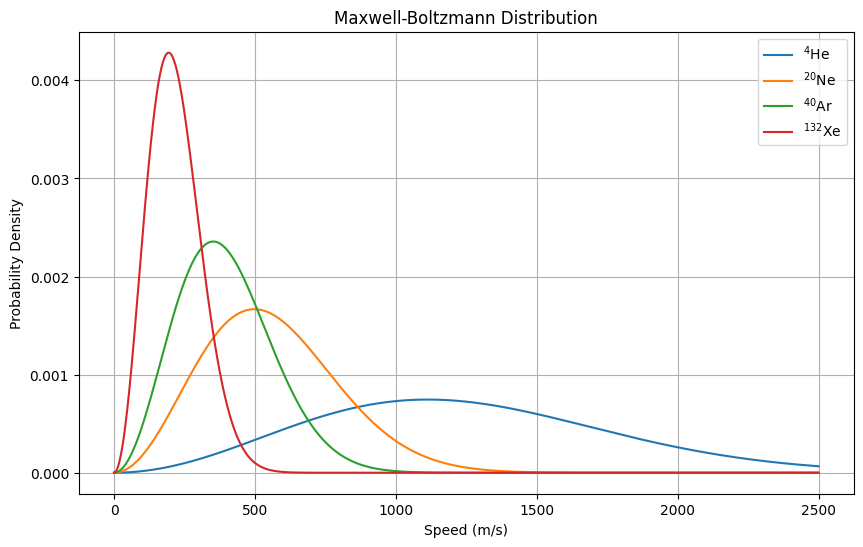

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants

# Constants
# https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl
m_He = 4.002_603_254_13  # Relative atomic mass of He
m_Ne = 19.992_440_1762   # Relative atomic mass of Ne
m_Ar = 39.962_383_1237   # Relative atomic mass of Ar
m_Xe = 131.904_155_0856  # Relative atomic mass of Xe
ms = np.array([m_He, m_Ne, m_Ar, m_Xe]) * physical_constants['atomic mass constant'][0]  # Masses in kg
T = 298.15  # Temperature in K

# Speed range
v = np.linspace(0, 2500, 1000)  # Speed in m/s

# Maxwell-Boltzmann distribution
def maxwell_boltzmann(v, m, T):
    return 4 * np.pi * (m / (2 * np.pi * physical_constants['Boltzmann constant'][0] * T))**(3/2) * v**2 * np.exp(-m * v**2 / (2 * physical_constants['Boltzmann constant'][0] * T))

# Plotting the distribution
plt.figure(figsize=(10, 6))
labels = ['$^4$He', '$^{20}$Ne', '$^{40}$Ar', '$^{132}$Xe']
for i, m in enumerate(ms):
    plt.plot(v, maxwell_boltzmann(v, m, T), label=labels[i])
plt.xlabel('Speed (m/s)')
plt.ylabel('Probability Density')
plt.title('Maxwell-Boltzmann Distribution')
plt.legend()

plt.grid(True)
plt.show()

The plot shows that the distribution of speeds of particles in a gas depends on the mass of the particles. Lighter particles have higher speeds on average than heavier particles at the same temperature.

## Example: Macroscopic Dynamics of a Golf Ball

```{admonition} Why Study the Trajectory of a Golf Ball?
:class: note
In the ensuing lectures, we will study different algorithms for integrating the equations of motion. Other algorithms are implemented in `scipy.integrate`, such as the [Runge-Kutta method](https://mathworld.wolfram.com/Runge-KuttaMethod.html). The trajectory of a golf ball is a simple example that can be used to explore these algorithms.
```

In this example, we will simulate the trajectory of a golf ball of [mass 0.04593 kg](https://www.usga.org/equipment-standards/equipment-rules-2019/equipment-rules/equipment-rules.html#!ruletype=er&section=rule&partnum=4&rulenum=3) and [radius 0.02134 m](https://www.usga.org/equipment-standards/equipment-rules-2019/equipment-rules/equipment-rules.html#!ruletype=er&section=rule&partnum=4&rulenum=4) using the equations of motion. The golf ball is launched with an [initial speed of 77.65 m/s](https://www.pgatour.com/stats/detail/02402) at an [angle of 10.22 degrees](https://www.pgatour.com/stats/detail/02404) with the horizontal. We will take into account the effects of drag and lift forces on the golf ball. The drag force is given by

$$
F_d = \frac{1}{2} \rho v^2 C_d A
$$

where $\rho$ is the air density ([1.205 kg/m$^3$ at 20 °C and 1 atm](https://www.wolframalpha.com/input?i=air+density)), $v$ is the speed of the golf ball, $C_d$ is the drag coefficient ([~0.25 for a hexagonally dimpled ball](https://doi.org/10.1017/S0001925900007617) with a [spin rate of ~2,526.3 rpm](https://www.pgatour.com/stats/detail/02405) and an initial speed of ~77.65 m/s), and $A$ is the cross-sectional area of the golf ball ($\pi r^2$). The lift force is given by

$$
F_l = \frac{1}{2} \rho v^2 C_l A
$$

where $C_l$ is the lift coefficient ([~0.15 for a hexagonally dimpled ball](https://doi.org/10.1017/S0001925900007617) with a spin rate of ~2,526.3 rpm and an initial speed of ~77.65 m/s). The equations of motion for the golf ball are given by

$$
\begin{aligned}
\frac{dv_x}{dt} &= -\frac{F_d}{m} \frac{v_x}{v} - \frac{F_l}{m} \frac{v_y}{v} \\
\frac{dv_y}{dt} &= -\frac{F_d}{m} \frac{v_y}{v} + \frac{F_l}{m} \frac{v_x}{v} - g
\end{aligned}
$$

where $v = \sqrt{v_x^2 + v_y^2}$ is the speed of the golf ball, $g$ is the acceleration due to gravity, and $m$ is the mass of the golf ball. We will solve these equations numerically to simulate the trajectory of the golf ball.

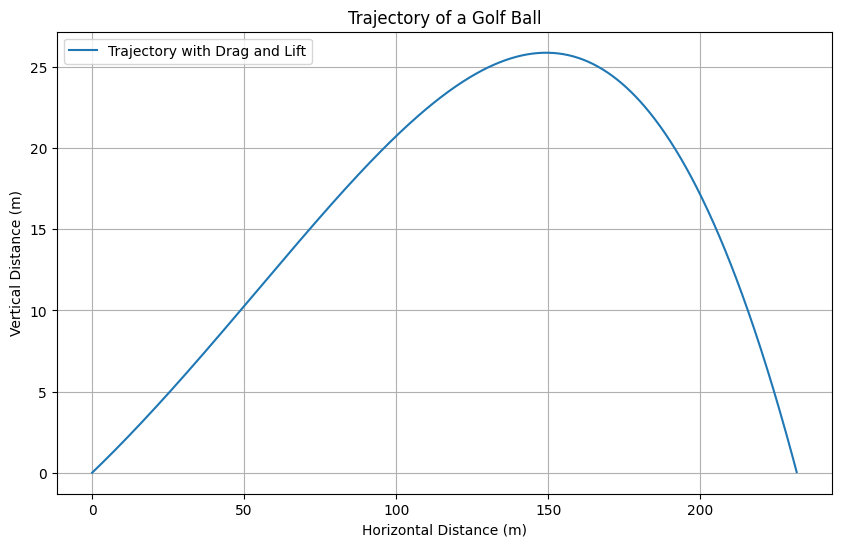

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Physical constants
m = 0.04593          # Mass of golf ball in kg
r = 0.02134          # Radius in meters (diameter is 42.67 mm)
A = np.pi * r**2     # Cross-sectional area in m^2
C_d = 0.25           # Drag coefficient for a sphere
C_l = 0.15           # Lift coefficient
rho = 1.225          # Air density in kg/m^3
g = 9.81             # Acceleration due to gravity in m/s^2

# Initial conditions
v0 = 77.65                   # Initial speed in m/s
theta = np.deg2rad(10.22)    # Launch angle in radians
x0 = 0.0                     # Initial horizontal position
y0 = 0.0                     # Initial vertical position
v0x = v0 * np.cos(theta)     # Initial horizontal velocity
v0y = v0 * np.sin(theta)     # Initial vertical velocity

# Define the ODE system
def golf_ball_ode(t, y):
    x, y_pos, vx, vy = y
    v = np.hypot(vx, vy)
    # Drag force
    F_d = 0.5 * rho * v**2 * C_d * A
    F_dx = -F_d * (vx / v)
    F_dy = -F_d * (vy / v)
    # Lift force
    F_l = 0.5 * rho * v**2 * C_l * A
    F_lx = F_l * (-vy / v)
    F_ly = F_l * (vx / v)
    # Net forces
    Fx = F_dx + F_lx
    Fy = F_dy + F_ly - m * g
    # Accelerations
    ax = Fx / m
    ay = Fy / m
    return [vx, vy, ax, ay]

# Event function to stop integration when the ball hits the ground
def hit_ground(t, y):
    return y[1]  # Vertical position

hit_ground.terminal = True    # Stop the integration
hit_ground.direction = -1     # Only detect zeros when the function is decreasing

# Time span for the simulation
t_span = (0, 10)                   # Simulate for 10 seconds
t_eval = np.linspace(0, 10, 1000)  # Time points where solution is computed

# Initial state vector
y_initial = [x0, y0, v0x, v0y]

# Solve the ODE
solution = solve_ivp(
    golf_ball_ode,
    t_span,
    y_initial,
    t_eval=t_eval,
    events=hit_ground,
    rtol=1e-8,
    atol=1e-10
)

# Extract the solution
x = solution.y[0]
y_pos = solution.y[1]

# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x, y_pos, label='Trajectory with Drag and Lift')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.title('Trajectory of a Golf Ball')
plt.legend()
plt.grid(True)
plt.show()

## Summary

In this lecture, we introduced the basic idea of molecular dynamics simulations and how they can be used to study the behavior of atoms and molecules in a system. We also discussed how observable quantities can be "measured" in a molecular dynamics simulation by calculating the average value of the quantity over time. Finally, we presented an example of simulating the trajectory of a golf ball using the equations of motion.